In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA

import mglearn
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn import decomposition

# Principal Component Analysis PCA
1. Encontrar la direccion en la cual hay una mayor varianza PC1.
2. Encontrar un eje ortogonal que intente maximizar la varianza PC2.
3. Los dos ejes los toma como nuevos parámetros para graficar datos

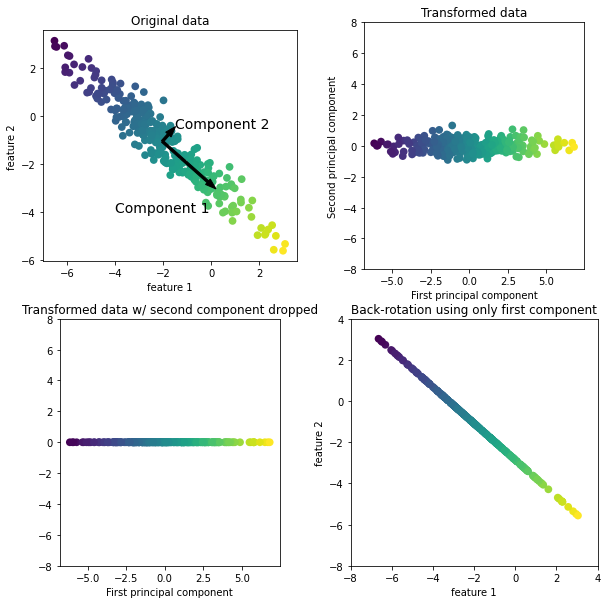

In [5]:
mglearn.plots.plot_pca_illustration()

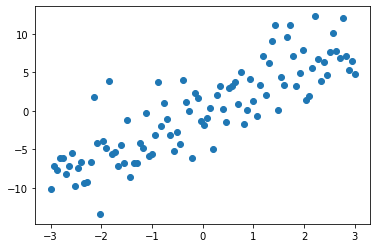

In [6]:
data = np.loadtxt("data/DataPCA.dat")
data[:,0] = (data[:,0]-np.mean(data[:,0]))
data[:,1] = (data[:,1]-np.mean(data[:,1]))
plt.scatter(data[:,0], data[:,1])

In [8]:
# Calcular la matriz de covarianza de los datos
CovMatrix = np.cov(data.T)
print(CovMatrix)

[[ 3.09152137  8.82101855]
 [ 8.82101855 34.56025706]]


In [10]:
def E(value):
    return sum(value)/(len(value)-1)

def GetCov(datos):
    num_var = len(datos[0]) #numero de variables
    CovM = np.ones((num_var, num_var))
    for i in range(num_var):
        for j in range(num_var):
            data1 = data[:,i] # tomar la columna i
            data2 = data[:,j]
            mean1 = E(data1)
            mean2 = E(data2)
            CovM[i,j] = E((data1-mean1)*(data2-mean2))
    return CovM

In [11]:
CovMatrix1 = GetCov(data)
print(CovMatrix1)

[[ 3.09152137  8.82101855]
 [ 8.82101855 34.56025706]]


In [12]:

# Obtener los Auto-valores  y auto-Vectores
values, vectors = np.linalg.eig(CovMatrix)
print(values)
print(vectors)

[ 0.78757722 36.86420121]
[[-0.96754198 -0.25271035]
 [ 0.25271035 -0.96754198]]


In [13]:
print(vectors[0,0],vectors[0,1])
print(vectors[1,0],vectors[1,1])

-0.9675419779586063 -0.2527103497839919
0.2527103497839919 -0.9675419779586063


$$ m = tan\theta = v[1,0]/v[0,0] $$$$ 1/m =cot\theta = v[1,1]/v[0,1] $$

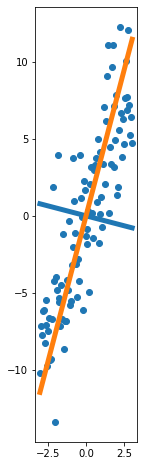

In [14]:
fig = plt.figure(figsize=(4,8))
ax = plt.axes()
plt.scatter(data[:,0], data[:,1])
x_line = np.linspace(-3.0,3.0)
plt.plot(x_line, x_line*vectors[1,0]/vectors[0,0], linewidth=5.0)
plt.plot(x_line, x_line*vectors[1,1]/vectors[0,1], linewidth=5.0)
ax.set_aspect(1.0)

In [15]:
new_data = np.dot(vectors.T, data.T)

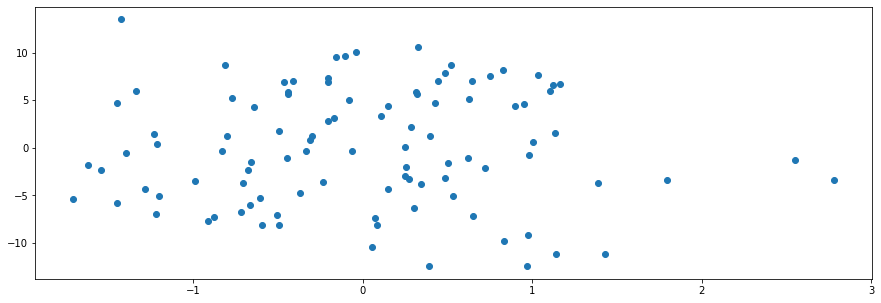

In [18]:
fig = plt.figure(figsize=(15,5))
ax = plt.axes()
plt.scatter(new_data[0,:], new_data[1,:])
plt.show()

# Usemos las herramientas de PCA para limpiar datos

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

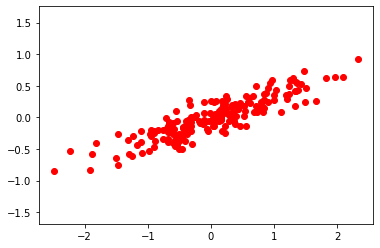

In [21]:
np.random.seed(1) 
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'or')
plt.axis('equal')

In [22]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [23]:
print(pca.explained_variance_) #eigenvalues
print(pca.components_) #eigenvectors

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


[-2.47419458 -0.86089761]
[-0.1340136   0.38515116]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9497608386363482,
 1.0052301483776818)

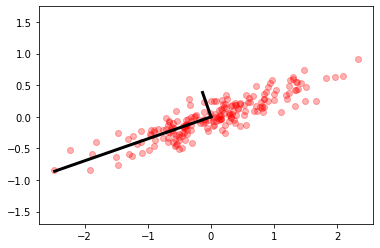

In [24]:
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    print(v)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal')

Una de las dos direcciones es importante, la otra dirección puede ser ignorada. Veamos que sucede si mantenemos el 95% de la varianza



In [28]:
clf = PCA(0.95)
X_trans = clf.fit_transform(X) #Hacemos una proyeccion, bajamos la dimensionalidad

In [29]:
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


Los datos sufren una compresión 'Limpieza' del 50% manteniendo la información inicial


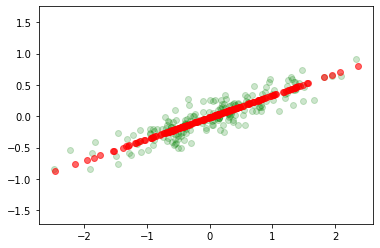

In [30]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'og', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.6)
plt.axis('equal');

# Uso de PCA para reducir la dimensionalidad de los datos

In [34]:
cancer = load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [35]:
print(cancer.feature_names.shape)

(30,)


In [36]:
#Definimos PCA de dos componentes
pca = PCA(n_components = 2)
pca.fit(cancer.data)

PCA(n_components=2)

In [38]:
# Generar una transformacion que reduzca la dimensionalidad
datos_transformados = pca.transform(cancer.data)
print(cancer.data.shape, datos_transformados.shape)
# Nos quedan las que tienen mayor varianza

(569, 30) (569, 2)


In [39]:
def Plot(vector):
    mglearn.discrete_scatter(vector[:,0],vector[:,1], cancer.target)
    plt.legend(cancer.target_names,loc='best')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')

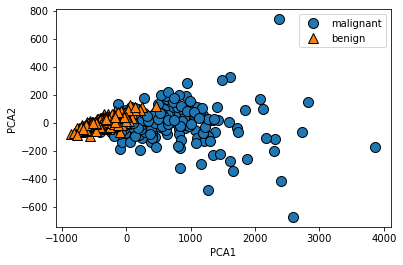

In [41]:
Plot(datos_transformados)

# Generar un modelo de juguete

In [42]:
X1, Y1 = make_blobs(n_features = 10, n_samples=100, centers = 4, random_state=4, cluster_std=1)
print(X1.shape)
print(Y1.shape)

(100, 10)
(100,)


In [44]:
matrix = X1

In [45]:
# Crear un dataframe con las características
df = pd.DataFrame(matrix, index=range(matrix.shape[0]), columns=range(matrix.shape[1]) )
print(len(df.columns))

10


In [46]:
# Agregar el target
df['y'] = Y1
print(len(df.columns))

11


In [47]:
df.rename(columns={0:'x1',1:'x2',2:'x3',3:'x4',4:'x5',5:'x6',6:'x7',7:'x8',8:'x9',9:'x10'}, inplace=True)
print(df.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'y'], dtype='object')


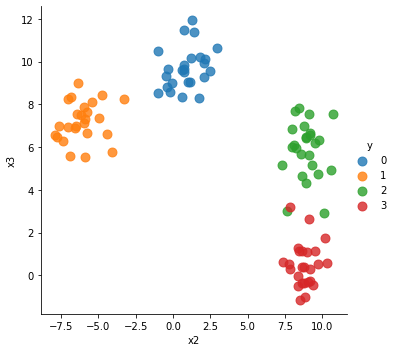

In [50]:
# Seleccionamos dos de las características.

sns.lmplot(x='x2', y='x3', data=df, fit_reg=False, hue='y', legend=True, scatter_kws={'s':80})

In [52]:
# Reducir dimensionalidad
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X1)

In [53]:
df1 = pd.DataFrame( {'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4'] } )
print(df1)

        var   PC
0  0.445205  PC1
1  0.362620  PC2
2  0.169061  PC3
3  0.005475  PC4


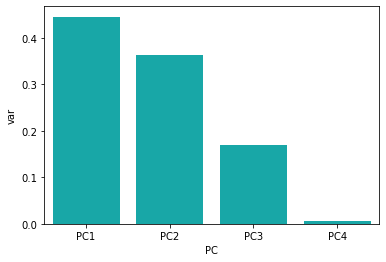

In [54]:
plt.figure()
sns.barplot(x='PC', y='var', data=df1, color='c')
plt.show()

In [55]:
pc_df = pd.DataFrame(data=pc, columns=['PC1','PC2','PC3','PC4'])
pc_df['Cluster'] = Y1

#print(pc_df)

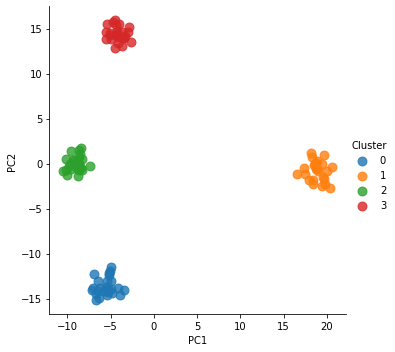

In [60]:
sns.lmplot(x='PC1', y='PC2', data=pc_df, fit_reg=False, hue='Cluster', legend=True, scatter_kws={'s':80})


# Modelamiento de sistemas lineales bajo superposición.

$$ \vec{E}(\vec{r}) = \frac{1}{4\pi \epsilon_{0}} \sum_{i = 1}^{n} \frac{q_{i}}{|\vec{r}-\vec{r}_{i}|^{3}} (\vec{r}-\vec{r}_{i})   $$